# **Credit Card Fraud Detector**

###**Context:**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### **Content:**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### **Our Goals:**
* *Understand the distribution of the given data.*
* *Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions.*
* *Determine the Classifiers we are going to use and decide which one has a higher accuracy.* 

In [42]:
# Importing Libraries

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
cp /content/drive/MyDrive/creditcard.csv /content/creditcard.csv

In [45]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
df.shape

(284807, 31)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [49]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
df.duplicated().sum()

1081

In [51]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## **Univariate Analysis**

In [52]:
plt.style.use('seaborn-pastel')

In [53]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

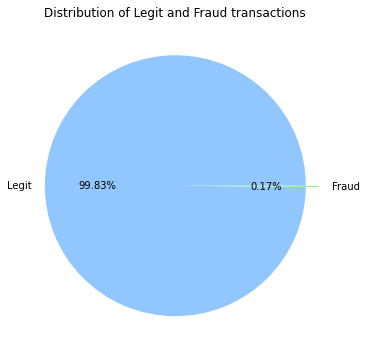

In [54]:
plt.figure(figsize=(6,6))
plt.pie(df['Class'].value_counts(), labels = ['Legit', 'Fraud'], explode = [0,0.1], autopct="%1.2f%%")
plt.title("Distribution of Legit and Fraud transactions")
plt.show()

### This clearly shows that the data is highly imbalanced with 99.83% of non-fraudulent transactions

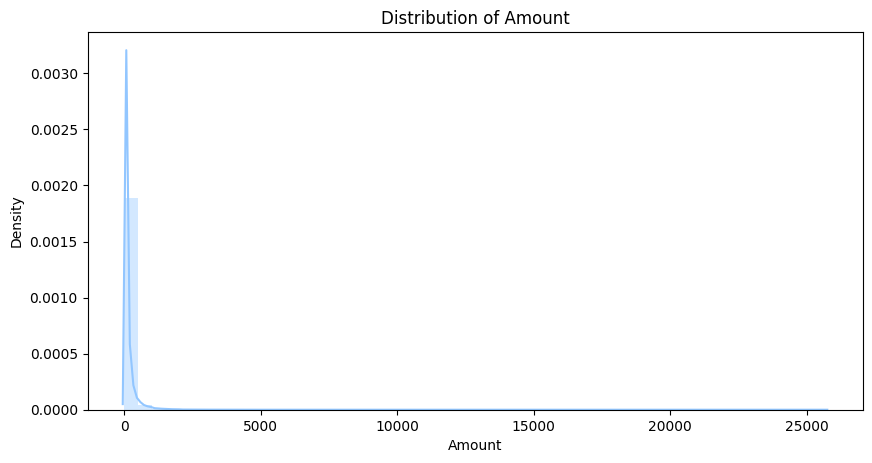

In [55]:
# Distribution of Amount 
plt.figure(figsize=(10,5) , dpi = 100)
sns.distplot(df[df['Class']==0]['Amount'])
plt.title("Distribution of Amount")
plt.show()

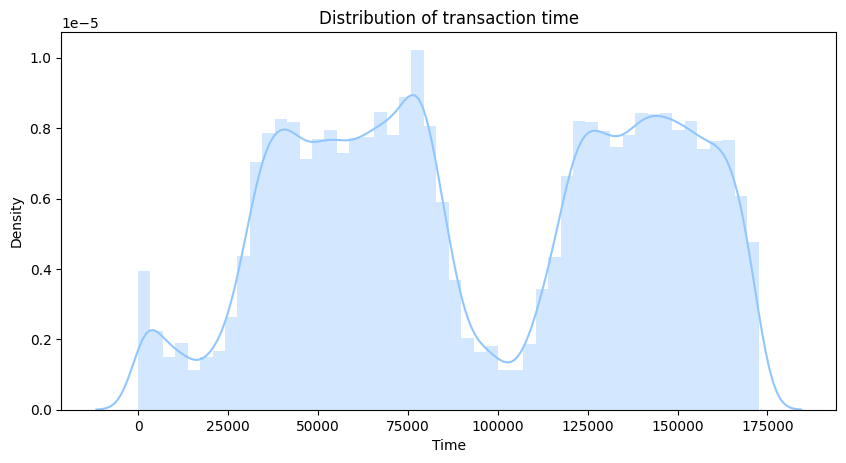

In [56]:
plt.figure(figsize=(10,5) , dpi = 100)
sns.distplot(df['Time'])
plt.title("Distribution of transaction time")
plt.show()

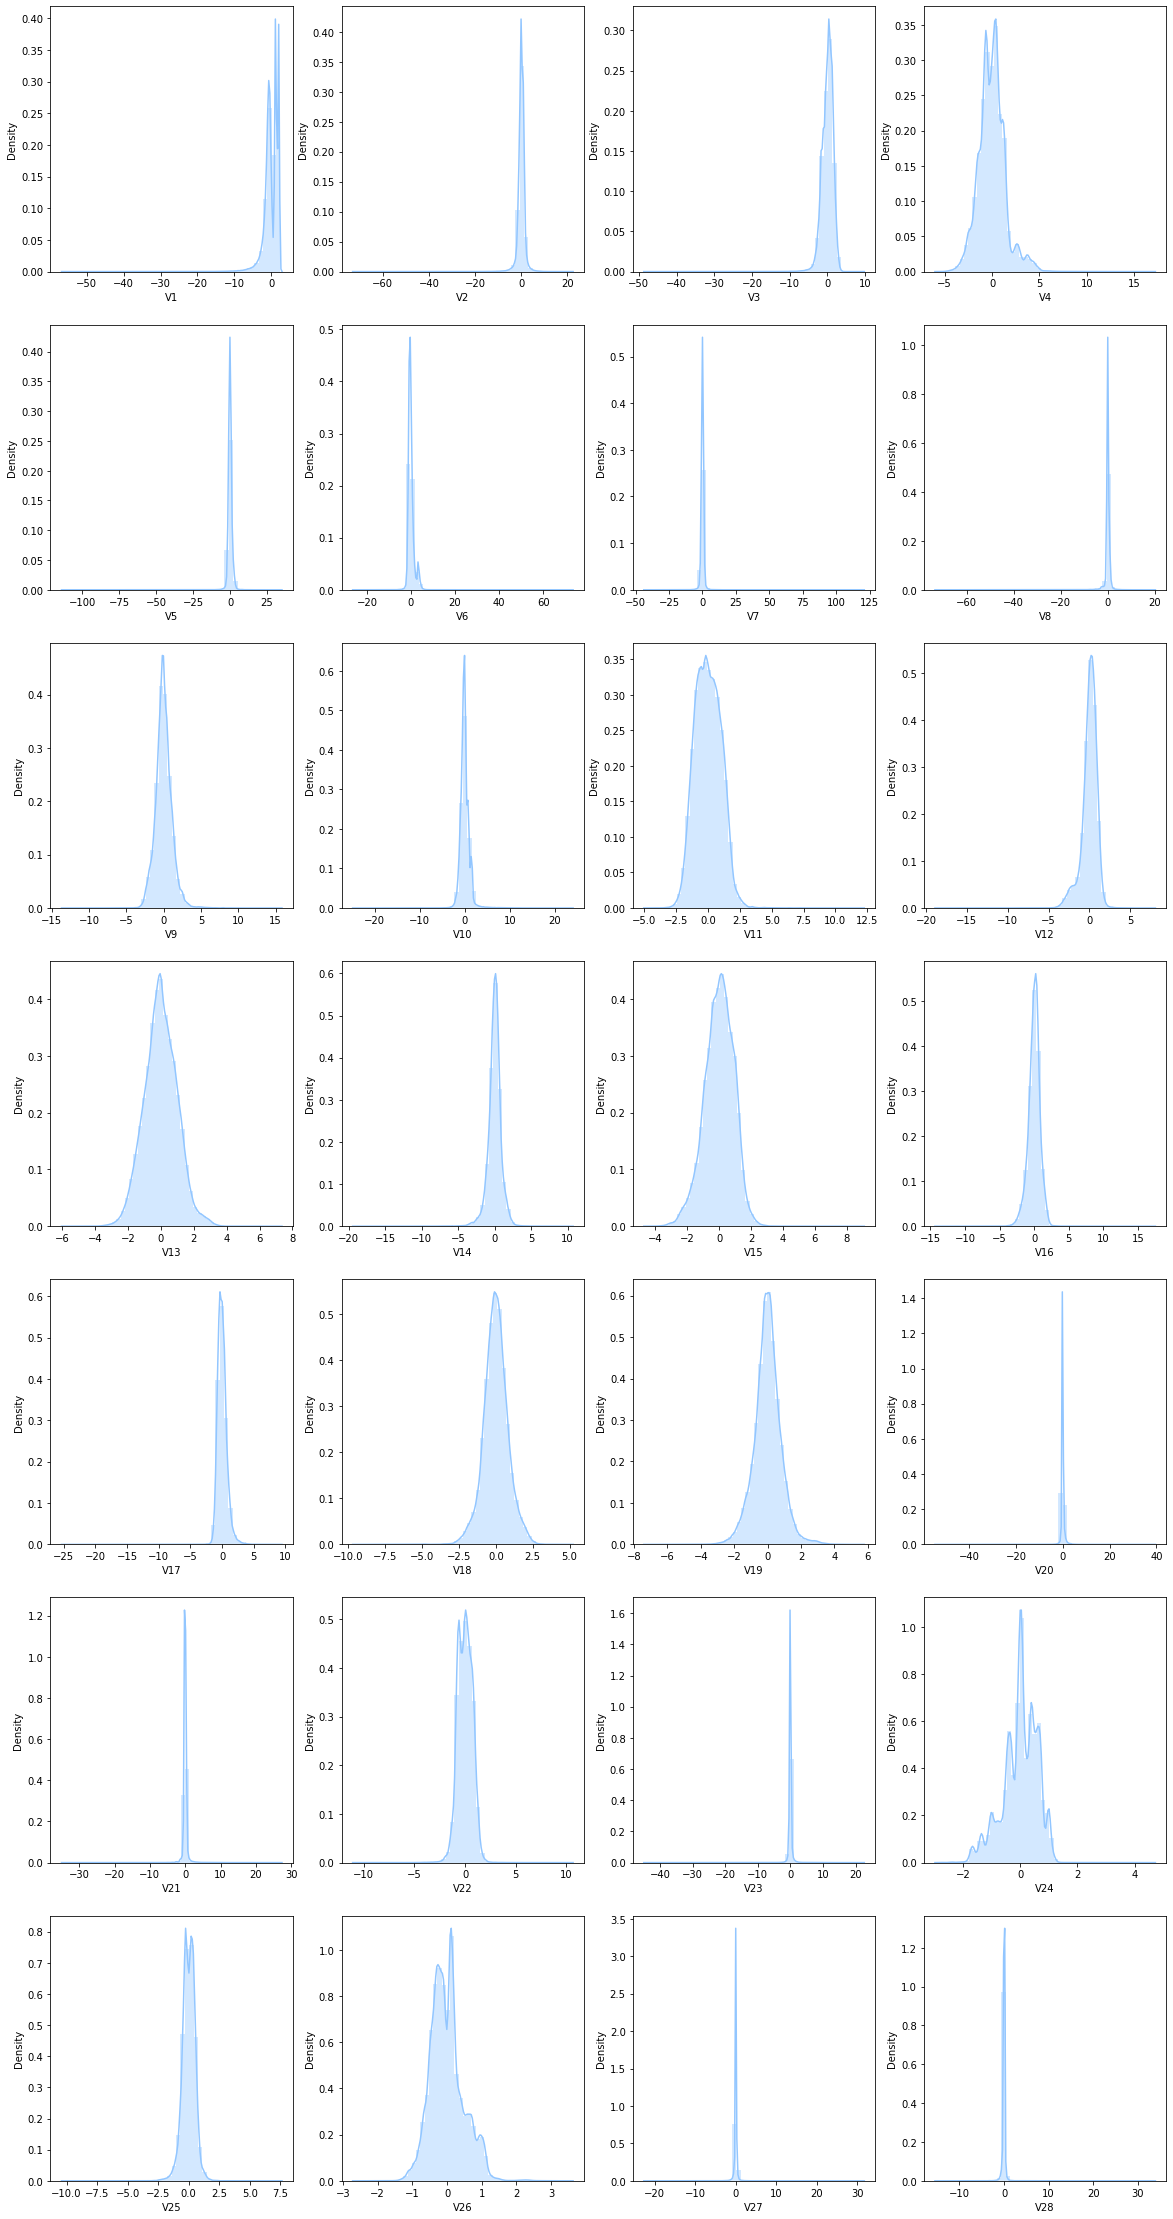

In [57]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(20,40))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
  sns.distplot(df_temp[col], ax = ax[index])
  index = index + 1
plt.show()

## **Bivariate Analysis**

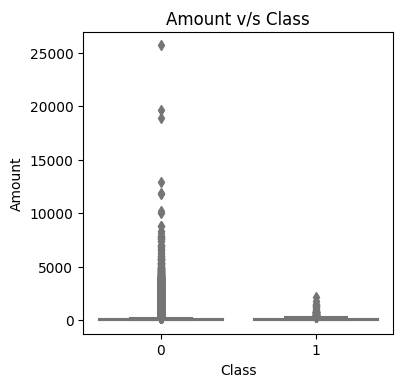

In [58]:
# Amount v/s Class
plt.figure(figsize=(4,4) , dpi = 100)
sns.boxplot(data = df, x = df['Class'], y = df['Amount'])
plt.title('Amount v/s Class')
plt.show()

In [59]:
# Identifying and removing Outliers
# Method 1

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*(IQR)
lower_limit = Q3 - 1.5*(IQR)

# outliers = df[(df['Amount'] < lower_limit) | (df['Amount'] > upper_limit)]
# df_new = df[(df['Amount'] > lower_limit) & (df['Amount'] < upper_limit)]

In [60]:
# Method 2: Just by observation, we can see that all the outliers lies above 10,000

df = df[df['Amount']<10000]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Scaling and Distributing the data**

In [61]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
df['amount_scaled'] = rb.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = rb.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783399,-0.994989
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269843,-0.994989
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.984069,-0.994978
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418390,-0.994978
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670626,-0.994966


## **Undersampling Data**:


In [62]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]
print(legit.shape, fraud.shape)

(284307, 31) (492, 31)


In [63]:
legit_sample = legit.sample(n=492)

In [64]:
df2 = pd.concat([legit_sample, fraud], axis=0)
df2.shape

(984, 31)

In [65]:
X = df2.drop(columns=['Class'], axis=1)
Y = df2['Class']

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(984, 2)

## **Developing Classification Models:**


In [67]:
X = df2.drop('Class', axis=1)
y = df2['Class']

# SPLITTING IN TRAIN AND TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#converting to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [69]:
print('For X:-','Train dataset :',X_train.shape,',','Test dataset :',X_test.shape)
print('For y:-','Train dataset :',y_train.shape,',','Test dataset :',y_test.shape)

For X:- Train dataset : (787, 30) , Test dataset : (197, 30)
For y:- Train dataset : (787,) , Test dataset : (197,)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
Models = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [72]:
from sklearn.model_selection import cross_val_score


for key, classifier in Models.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression has a training score of 93.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 93.0 % accuracy score
Classifier:  SVC has a training score of 94.0 % accuracy score
Classifier:  DecisionTreeClassifier has a training score of 92.0 % accuracy score


In [73]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
lr_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_lr = GridSearchCV(LogisticRegression(), lr_params)
grid_lr.fit(X_train, y_train)
# LR best estimator
lr_best = grid_lr.best_estimator_

#KNN
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train, y_train)
# KNears best estimator
knn_best = grid_knn.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc_best = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# tree best estimator
tree_best = grid_tree.best_estimator_

In [74]:
print( lr_best,'\n', knn_best,'\n' ,svc_best,'\n', tree_best)

LogisticRegression(C=1) 
 KNeighborsClassifier(n_neighbors=2) 
 SVC(C=1) 
 DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


Cross Validation Score:

In [75]:
lr_score = cross_val_score(lr_best, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(lr_score.mean() * 100, 2).astype(str) + '%')


knn_score = cross_val_score(knn_best, X_train, y_train, cv=5)
print('KNN Cross Validation Score', round(knn_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc_best, X_train, y_train, cv=5)
print('SVC Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_best, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.39%
KNN Cross Validation Score 93.77%
SVC Cross Validation Score 93.52%
DecisionTree Classifier Cross Validation Score 92.5%


Confusion Matrix:

In [76]:
from sklearn.metrics import confusion_matrix


y_pred_lr = lr_best.predict(X_test)
y_pred_knn = knn_best.predict(X_test)
y_pred_svc = svc_best.predict(X_test)
y_pred_tree = tree_best.predict(X_test)


lr_cm = confusion_matrix(y_test, y_pred_lr)
knn_cm = confusion_matrix(y_test, y_pred_knn)
svc_cm = confusion_matrix(y_test, y_pred_svc)
tree_cm = confusion_matrix(y_test, y_pred_tree)

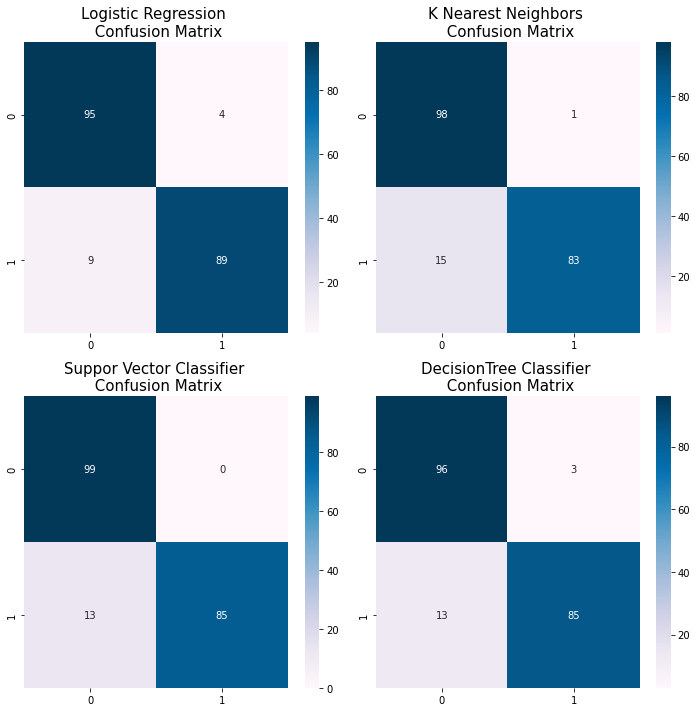

In [77]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.heatmap(lr_cm, cmap="PuBu", annot=True)
plt.title('Logistic Regression \n Confusion Matrix', fontsize=15)

plt.subplot(2,2,2)
sns.heatmap(knn_cm, cmap="PuBu", annot=True)
plt.title('K Nearest Neighbors \n Confusion Matrix', fontsize=15)

plt.subplot(2,2,3)
sns.heatmap(svc_cm, cmap="PuBu", annot=True)
plt.title('Suppor Vector Classifier \n Confusion Matrix', fontsize=15)

plt.subplot(2,2,4)
sns.heatmap(tree_cm, cmap="PuBu", annot=True)
plt.title('DecisionTree Classifier \n Confusion Matrix', fontsize=15)

plt.tight_layout()
plt.show()

Classification Report:

In [78]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knn))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        99
           1       0.99      0.85      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.87      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted

ROC Curve:

In [79]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

In [80]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, y_pred_lr))
print('KNears Neighbors: ', roc_auc_score(y_test, y_pred_knn))
print('Support Vector Classifier: ', roc_auc_score(y_test,y_pred_svc))
print('Decision Tree Classifier: ', roc_auc_score(y_test, y_pred_tree))

Logistic Regression:  0.933879612451041
KNears Neighbors:  0.9184188827045972
Support Vector Classifier:  0.9336734693877551
Decision Tree Classifier:  0.91852195423624


In [81]:
lr_fpr, lr_tpr, lr_thresold = roc_curve(y_test, y_pred_lr)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, y_pred_knn)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred_svc)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, y_pred_tree)

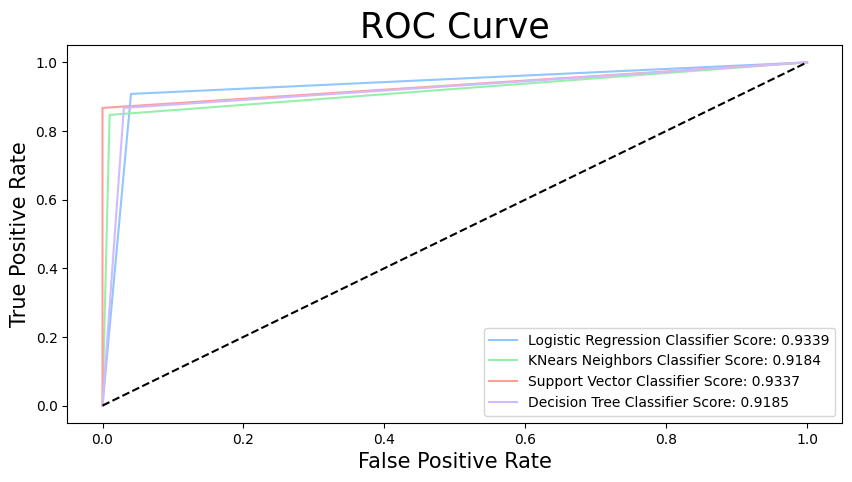

In [82]:
plt.figure(figsize=(10,5), dpi=100)


plt.plot(lr_fpr, lr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr)))
plt.plot(knn_fpr, knn_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_knn)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_tree)))
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve', fontsize=25)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend()
plt.show()

# **Summary:**

*   __Logistic Regression__ classifier is more accurate than the other three classifiers in most cases.
*   __GridSearchCV__ is used to determine the paremeters that gives the best predictive score for the classifiers.
*   Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that Logistic Regression pretty accurately separates fraud and non-fraud transactions.



## **Observation:**

*   The main advantage of undersampling is that we can correct imbalanced data to reduce the risk of machine learning algorithm skewing toward the majority
*   Undersampling has less storage requirements and thus better run times for analyses
*   However, in order to balance the class; we are losing out a lot of majority class data points i.e. huge information loss
*   Another disadvantage of undersampling is that the sample of the majority class chosen could be biased




## **Alternate Method for solving the "Class Imbalance Problems":**


### SMOTE Technique (Over-Sampling):


*  SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes
*  __Location of the synthetic points:__ SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points
*   __Final Effect:__ More information is retained since we didn't have to delete any rows unlike in random undersampling
*   __Accuracy || Time Tradeoff:__ Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated. Also, in some cases, oversampling may lead to overfitting